# Intrustion Detection System
## Network Traffic Classification

<b>Dataset:</b> <i>CSC IDS 2018</i><br>
<a href="./Datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv">Description</a>

<b>Target Variable:</b> <i>Label</i> 
* Benign
* DoS attacks-GoldenEye
* DoS attacks-Slowloris
* Brute Force -Web
* Brute Force -XSS 
* SQL Injection            
* Infilteration   


<b>Key Objectives:</b>
1. Import Libraries & Load Dataset 
2. Describe Data 
3. Verify Data Quality
4. Data Preparation 
5. Convert Objects to Numerical 
6. Export Data

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load dataset

* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [3]:
#provide the path of the dataset
df = pd.read_csv("../../../Downloads/CSC IDS 2018/Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")


#df = pd.read_csv("./Datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv")
#df = pd.read_csv("./Datasets/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv")

# df = pd.read_csv("../../../Downloads/CSC IDS 2018/Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")
# df_big = pd.read_csv("../../../Downloads/CSC IDS 2018/Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")
#df20180222 = pd.read_csv("./Datasets/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv")
#df20180301 = pd.read_csv("./Datasets/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv")

## Describe the Data

In [4]:
# check if data is loaded correctly
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign


In [5]:
df.describe

<bound method NDFrame.describe of                                         Flow ID          Src IP  Src Port  \
0        172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172     45498   
1                         8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
2                         8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
3                         8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
4                         8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
...                                         ...             ...       ...   
7948743    172.31.69.7-185.2.197.19-623-42801-6    185.2.197.19     42801   
7948744     172.31.69.7-195.22.125.42-22-2178-6   195.22.125.42      2178   
7948745     172.31.69.7-107.3.188.61-23-14259-6    107.3.188.61     14259   
7948746   172.31.69.7-5.188.11.188-3039-54193-6    5.188.11.188     54193   
7948747   172.31.69.7-188.19.76.194-445-57958-6   188.19.76.194     57958   

               Dst IP  Dst Port  Protocol

In [6]:
# Check the dimensions
df.shape

# df20180222.shape
# (1048575, 80)

# df20180301.shape
# (331125, 80)

# df_big.shape
# (7948748, 84)

(7948748, 84)

In [7]:
#Check the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948748 entries, 0 to 7948747
Data columns (total 84 columns):
Flow ID              object
Src IP               object
Src Port             int64
Dst IP               object
Dst Port             int64
Protocol             int64
Timestamp            object
Flow Duration        int64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          object
Flow Pkts/s          object
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IA

In [8]:
#Check for Column Names
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [9]:
#Get the Stats on the Data
df.describe(include='all')

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,7948748,7948748,7.948748e+06,7948748,7.948748e+06,7.948748e+06,7948748,7.948748e+06,7.948748e+06,7.948748e+06,...,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7948748
unique,5030830,31291,NaN,27076,NaN,NaN,38478,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,NaN,172.31.0.2,NaN,NaN,20/02/2018 08:29:42,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,93775,93775,NaN,2457307,NaN,NaN,850,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7372557
mean,NaN,NaN,4.527693e+04,NaN,7.364011e+03,9.363284e+00,NaN,1.353327e+07,1.698159e+01,6.713097e+00,...,1.597078e+01,2.591440e+05,1.328942e+05,3.871102e+05,1.694898e+05,5.174784e+06,1.802277e+05,5.322670e+06,5.006831e+06,NaN
std,NaN,NaN,2.112095e+04,NaN,1.727306e+04,5.247283e+00,NaN,3.243525e+07,1.244368e+03,1.580529e+02,...,6.187313e+00,3.244362e+06,1.978675e+06,4.296665e+06,2.728013e+06,1.533011e+07,1.805569e+06,1.562210e+07,1.517835e+07,NaN
min,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,4.970600e+04,NaN,5.300000e+01,6.000000e+00,NaN,4.480000e+02,1.000000e+00,1.000000e+00,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,5.241300e+04,NaN,8.000000e+01,6.000000e+00,NaN,5.207900e+04,2.000000e+00,1.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,NaN,NaN,5.779900e+04,NaN,3.389000e+03,1.700000e+01,NaN,3.170154e+06,7.000000e+00,5.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [10]:
df.tail(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
7948743,172.31.69.7-185.2.197.19-623-42801-6,185.2.197.19,42801,172.31.69.7,623,6,20/02/2018 01:41:45,94042,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948744,172.31.69.7-195.22.125.42-22-2178-6,195.22.125.42,2178,172.31.69.7,22,6,20/02/2018 11:51:06,251281,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948745,172.31.69.7-107.3.188.61-23-14259-6,107.3.188.61,14259,172.31.69.7,23,6,20/02/2018 08:49:20,21,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948746,172.31.69.7-5.188.11.188-3039-54193-6,5.188.11.188,54193,172.31.69.7,3039,6,20/02/2018 02:00:54,181954,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948747,172.31.69.7-188.19.76.194-445-57958-6,188.19.76.194,57958,172.31.69.7,445,6,20/02/2018 04:07:01,687378,2,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [11]:
df['Label'].value_counts()
# Benign                    7372557
# DDoS attacks-LOIC-HTTP     576191
# Name: Label, dtype: int64

Benign                    7372557
DDoS attacks-LOIC-HTTP     576191
Name: Label, dtype: int64

In [12]:
#df20180222['Label'].value_counts()
# Benign              1048213
# Brute Force -Web        249
# Brute Force -XSS         79
# SQL Injection            34
# Name: Label, dtype: int64

In [13]:
# df20180301['Label'].value_counts()
# Benign           238037
# Infilteration     93063
# Label                25
# Name: Label, dtype: int64

## Verify Data Quality

Look out for the following:
* Incorrect or unexpected data type & format (ALL)
* Duplicates (ALL)
* Unexpected dimensions (i.e. missing rows or columns) (ALL)
* Incorrect Spelling (CAT)
* Mixed cases for strings (CAT)
* Unexpected outliers or anomalous values (NUM)
* Inconsistent or incorrect units of measurement (NUM)

In [14]:
# Incorrect or unexpected data type & format (ALL)
df.dtypes

Flow ID       object
Src IP        object
Src Port       int64
Dst IP        object
Dst Port       int64
              ...   
Idle Mean    float64
Idle Std     float64
Idle Max     float64
Idle Min     float64
Label         object
Length: 84, dtype: object

In [15]:
# Duplicates (ALL). 
# Checks for Duplicated Samples
df.duplicated().value_counts()

False    7948746
True           2
dtype: int64

## Data Preparation

### Removing Null Rows

In [16]:
df.columns[df.isna().any()].tolist()

['Flow Byts/s']

In [17]:
df_nulls = df[df.isna().any(axis=1)]
df_nulls.shape

(36767, 84)

In [18]:
# all the row with null values
df_nulls['Label'].value_counts() 

Benign    36767
Name: Label, dtype: int64

In [19]:
# remove null rows 
df_nonulls = df.dropna()

# remove headers
df_nonulls.drop(df_nonulls[df_nonulls['Label'] == 'Label'].index, inplace=True)

df_nonulls.shape

(7911981, 84)

In [20]:
df_nonulls[df_nonulls.isna().any(axis=1)]
# should be empty now

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


## Convert the Objects to Numerical

### Convert Label from Categorical to Numerical
* Benign - 0
* Non-Benign - 1

In [24]:
# Convert All Benign to 0 and all others (Non-Benign) to 1
df_nonulls.Label[df.Label == 'Benign'] = 0
df_nonulls.Label[df.Label != 'Benign'] = 1
df_nonulls['Label'] = df_nonulls['Label'].astype(int)

In [25]:
df_nonulls.Label.unique()

array([0, 1])

### Convert Timestamp from Object to DateTime

In [26]:
# Keep this for now as place holder for future 
df_nonulls['Timestamp'] = pd.to_datetime(df_nonulls['Timestamp'], infer_datetime_format=True)
# df_nonulls['Timestamp'].dt.hour.unique()
# df_nonulls['Timestamp'].dt.minute.unique()

### Drop Timestamp from DataFrame

In [27]:
# A bit unnecessary to convert to timestamp before changing it, but keeping as reminder
df_nonulls.drop('Timestamp', axis=1, inplace=True)

### Convert 'Flow Byts/s' & 'Flow Pkts/s'  from Object to Float

In [28]:
df_nonulls['Flow Byts/s'] = df_nonulls['Flow Byts/s'].astype(float)
df_nonulls['Flow Pkts/s'] = df_nonulls['Flow Pkts/s'].astype(float)

### Keep only finite values to avoid INF or NaN in Describe

In [29]:
# Identifying rows with only finite values (two different ways)
#df_subset = df_nonulls[np.isfinite(df_nonulls).all(1)]
df_subset = df_nonulls[~df_nonulls.isin([np.nan, np.inf, -np.inf]).any(1)]

In [30]:
print(df_nonulls.shape, df_subset.shape)

(7911981, 83) (7889295, 83)


In [31]:
# Identifying the rows that cause issues later down the line
# This is a resource intensive operation as you merge the two sets
# May want to skip this to avoid processing time
# df_diff = pd.merge(df_nonulls, df_subset, how='outer', indicator='Exist')
# df_diff = df_diff.loc[df_diff['Exist'] != 'both']
# df_diff.describe()

In [32]:
# df_nonulls.shape, df_subset.shape, df_diff.shape

In [33]:
# This is a problem column, possibly caused by conversion from Object to Float
# df_diff['Flow Byts/s'].describe()

In [34]:
# This is another problem column, possibly caused by conversion from Object to Float
# df_diff['Flow Pkts/s'].describe()

In [35]:
df_nonulls = df_subset

### Re-Check DataFrame Objects


In [36]:
#Check the features
df_nonulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7889295 entries, 0 to 7948747
Data columns (total 83 columns):
Flow ID              object
Src IP               object
Src Port             int64
Dst IP               object
Dst Port             int64
Protocol             int64
Flow Duration        int64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd

In [ ]:
df_nonulls.shape

### Check Label Balance

<i>Hint: Since we'll be using GridSearchCV, no need to further split into train and test set. Only split into predictor and target variables</i>

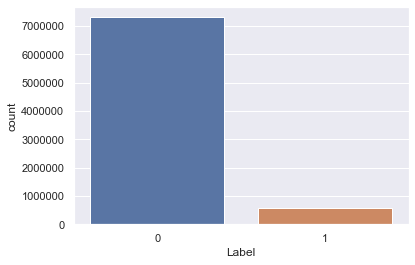

In [37]:
#Target variable is "Label"
X = df_nonulls.drop("Label", axis=1)
y = df_nonulls.Label

sns.set(font_scale=1)
sns.countplot(y)
# Benign
# DoS attacks-GoldenEye
# DoS attacks-Slowloris

In [ ]:
# Subset of Features
# df_subset = df_nonulls[['URG Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','Protocol',
#         'Pkt Size Avg','Flow Pkts/s','FIN Flag Cnt','ECE Flag Cnt','ACK Flag Cnt','Dst Port','Label']]
# df_subset.info(verbose=True)

In [38]:
print(X.shape,y.shape)

(7889295, 82) (7889295,)


In [ ]:
df_nonulls.to_csv("../../../Downloads/CSC IDS 2018/Processed-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")

In [3]:
#provide the path of the dataset
df_prepped = pd.read_csv("../../../Downloads/CSC IDS 2018/Processed-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")




In [4]:
df_prepped.shape

(7889295, 84)

In [5]:
df_prepped.describe

<bound method NDFrame.describe of          Unnamed: 0                                 Flow ID          Src IP  \
0                 0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172   
1                 1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1   
2                 2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1   
3                 3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1   
4                 4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1   
...             ...                                     ...             ...   
7889290     7948743    172.31.69.7-185.2.197.19-623-42801-6    185.2.197.19   
7889291     7948744     172.31.69.7-195.22.125.42-22-2178-6   195.22.125.42   
7889292     7948745     172.31.69.7-107.3.188.61-23-14259-6    107.3.188.61   
7889293     7948746   172.31.69.7-5.188.11.188-3039-54193-6    5.188.11.188   
7889294     7948747   172.31.69.7-188.19.76.194-445-57958-6   188.19.76.194   

         Src Port

In [7]:
df_prepped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889295 entries, 0 to 7889294
Data columns (total 84 columns):
Unnamed: 0           int64
Flow ID              object
Src IP               object
Src Port             int64
Dst IP               object
Dst Port             int64
Protocol             int64
Flow Duration        int64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd I

In [8]:
df_prepped.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,0
2,2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,0
3,3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,0
4,4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,0


### Build Training Set using SMOTE

In [13]:
df_prepped.drop('Unnamed: 0', axis=1, inplace=True)
df_prepped.drop('Flow ID', axis=1, inplace=True)
df_prepped.drop('Src IP', axis=1, inplace=True)
df_prepped.drop('Src Port', axis=1, inplace=True)
df_prepped.drop('Dst IP', axis=1, inplace=True)

In [14]:
df_prepped.shape

(7889295, 79)

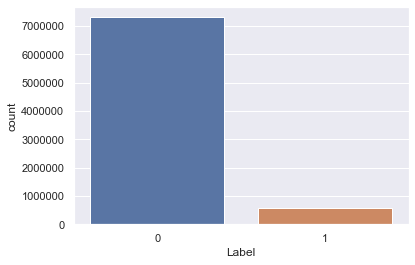

In [15]:
#Target variable is "Label"
X = df_prepped.drop("Label", axis=1)
y = df_prepped.Label

sns.set(font_scale=1)
sns.countplot(y)

In [17]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
from numpy import where

counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_test, y_test = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_test)
print(counter)

#647

Counter({0: 7313104, 1: 576191})
Counter({0: 576191, 1: 576191})


In [18]:
X_test.shape, y_test.shape

((1152382, 78), (1152382,))

In [19]:
# Copy training set
df_test_set = pd.concat([X_test,y_test], axis=1)

In [ ]:
df_test_set.shape

## Export Data

In [20]:
df_test_set["Label"].value_counts()

1    576191
0    576191
Name: Label, dtype: int64

In [21]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152382 entries, 0 to 1152381
Data columns (total 79 columns):
Dst Port             1152382 non-null int64
Protocol             1152382 non-null int64
Flow Duration        1152382 non-null int64
Tot Fwd Pkts         1152382 non-null int64
Tot Bwd Pkts         1152382 non-null int64
TotLen Fwd Pkts      1152382 non-null float64
TotLen Bwd Pkts      1152382 non-null float64
Fwd Pkt Len Max      1152382 non-null float64
Fwd Pkt Len Min      1152382 non-null float64
Fwd Pkt Len Mean     1152382 non-null float64
Fwd Pkt Len Std      1152382 non-null float64
Bwd Pkt Len Max      1152382 non-null float64
Bwd Pkt Len Min      1152382 non-null float64
Bwd Pkt Len Mean     1152382 non-null float64
Bwd Pkt Len Std      1152382 non-null float64
Flow Byts/s          1152382 non-null float64
Flow Pkts/s          1152382 non-null float64
Flow IAT Mean        1152382 non-null float64
Flow IAT Std         1152382 non-null float64
Flow IAT Max         11

#### Honestly unsure if I need to export to CSV if I have PKL file

In [22]:
df_test_set.to_csv("../../../Downloads/CSC IDS 2018/SMOTE-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")

In [24]:
df_test_set.to_pickle("../../../Downloads/CSC IDS 2018/SMOTE-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.pkl")

In [25]:
df_prepped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889295 entries, 0 to 7889294
Data columns (total 79 columns):
Dst Port             int64
Protocol             int64
Flow Duration        int64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Min      float64
Fwd Pkt Len Mean     float64
Fwd Pkt Len Std      float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Min      float64
Bwd Pkt Len Mean     float64
Bwd Pkt Len Std      float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Flow IAT Min         float64
Fwd IAT Tot          float64
Fwd IAT Mean         float64
Fwd IAT Std          float64
Fwd IAT Max          float64
Fwd IAT Min          float64
Bwd IAT Tot          float64
Bwd IAT Mean         float64
Bwd IAT Std          float64
Bwd IAT Max          float64
Bwd IAT Min          float6

In [26]:
df_prepped.to_csv("../../../Downloads/CSC IDS 2018/Processed2-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")

# EOF